In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/accidents_india.csv")

# Show basic info
print(df.shape)
df.head()


(684, 10)


,Day_of_Week,Light_Conditions,Sex_Of_Driver,Vehicle_Type,Speed_limit,Pedestrian_Crossing,Road_Type,Special_Conditions_at_Site,Number_of_Pasengers,Accident_Severity
0,Thursday,Darkness,0.0,1.0,20.0,0.0,5.0,0.0,3.0,Serious
1,Saturday,Darkness,0.0,5.0,40.0,3.0,3.0,1.0,3.0,Slight
2,Monday,Daylight,0.0,0.0,40.0,0.0,2.0,1.0,3.0,Slight
3,Monday,Darkness,1.0,1.0,20.0,1.0,3.0,0.0,5.0,Slight
4,Sunday,Daylight,0.0,1.0,20.0,1.0,6.0,1.0,4.0,Slight


In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
Day_of_Week,1
Light_Conditions,1
Sex_Of_Driver,1
Vehicle_Type,1
Speed_limit,1
Pedestrian_Crossing,1
Road_Type,1
Special_Conditions_at_Site,1
Number_of_Pasengers,1
Accident_Severity,1


In [ ]:
# Check missing values in percentage
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_percent[missing_percent > 0]


,0
Day_of_Week,0.146199
Light_Conditions,0.146199
Sex_Of_Driver,0.146199
Vehicle_Type,0.146199
Speed_limit,0.146199
Pedestrian_Crossing,0.146199
Road_Type,0.146199
Special_Conditions_at_Site,0.146199
Number_of_Pasengers,0.146199
Accident_Severity,0.146199


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/accidents_india.csv")  # Make sure the path is correct

# Now you can use df
df.isnull().sum()


,0
Day_of_Week,1
Light_Conditions,1
Sex_Of_Driver,1
Vehicle_Type,1
Speed_limit,1
Pedestrian_Crossing,1
Road_Type,1
Special_Conditions_at_Site,1
Number_of_Pasengers,1
Accident_Severity,1


In [ ]:
df.dropna(subset=['Day_of_Week', 'Speed_limit', 'Sex_Of_Driver', 'Accident_Severity'], inplace=True)


In [ ]:
df['Number_of_Pasengers'].fillna(1, inplace=True)  # or use median


<ipython-input-11-0db68d877c66>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Number_of_Pasengers'].fillna(1, inplace=True)  # or use median


In [ ]:
df = df[['Day_of_Week', 'Light_Conditions', 'Sex_Of_Driver',
         'Vehicle_Type', 'Speed_limit', 'Pedestrian_Crossing',
         'Road_Type', 'Special_Conditions_at_Site',
         'Number_of_Pasengers', 'Accident_Severity']]



In [ ]:
print(df.columns.tolist())



['Day_of_Week', 'Light_Conditions', 'Sex_Of_Driver', 'Vehicle_Type', 'Speed_limit', 'Pedestrian_Crossing', 'Road_Type', 'Special_Conditions_at_Site', 'Number_of_Pasengers', 'Accident_Severity']


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_clean = df.copy()  # to avoid changing original

# List of categorical columns to encode
cat_cols = ['Day_of_Week', 'Light_Conditions', 'Sex_Of_Driver',
            'Vehicle_Type', 'Pedestrian_Crossing',
            'Road_Type', 'Special_Conditions_at_Site']

# Apply label encoding
le = LabelEncoder()
for col in cat_cols:
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))


In [ ]:
# Fill missing numerical values (if any)
df_clean['Number_of_Pasengers'].fillna(df_clean['Number_of_Pasengers'].median(), inplace=True)
df_clean['Speed_limit'].fillna(df_clean['Speed_limit'].median(), inplace=True)


<ipython-input-17-1daf63e8fde2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Number_of_Pasengers'].fillna(df_clean['Number_of_Pasengers'].median(), inplace=True)
<ipython-input-17-1daf63e8fde2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [ ]:
X = df_clean.drop(columns=['Accident_Severity'])
y = df_clean['Accident_Severity']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.45255474452554745

Classification Report:
               precision    recall  f1-score   support

     Serious       0.39      0.47      0.43        60
      Slight       0.52      0.44      0.48        77

    accuracy                           0.45       137
   macro avg       0.45      0.45      0.45       137
weighted avg       0.46      0.45      0.45       137



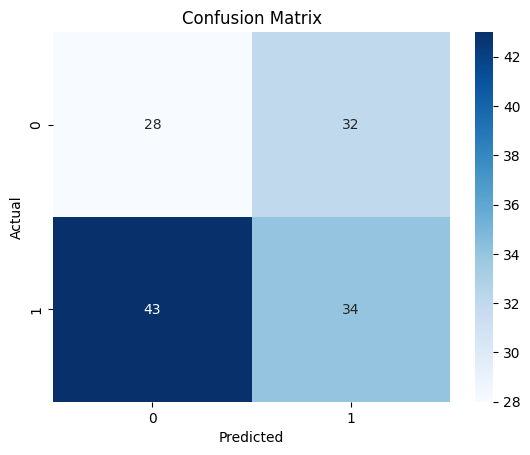

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Predict on first 5 rows from test data
predictions = model.predict(X_test[:5])
print("Predicted Severity:", predictions)
print("Actual Severity:   ", y_test[:5].values)


Predicted Severity: ['Slight' 'Slight' 'Slight' 'Serious' 'Serious']
Actual Severity:    ['Serious' 'Slight' 'Serious' 'Slight' 'Slight']


In [ ]:
required_columns = [
    'Day_of_Week',
    'Light_Conditions',
    'Sex_Of_Driver',
    'Vehicle_Type',
    'Pedestrian_Crossing',
    'Road_Type',
    'Special_Conditions_at_Site',
    'Speed_limit',
    'Number_of_Pasengers'
]


In [ ]:
import pandas as pd

# Input with all integer-encoded values
sample_data = {
    'Day_of_Week': [0],                # e.g., Monday
    'Light_Conditions': [1],           # e.g., Darkness
    'Sex_Of_Driver': [0],              # e.g., Male
    'Vehicle_Type': [2],               # e.g., Car
    'Pedestrian_Crossing': [0],        # e.g., None within 50 metres
    'Road_Type': [2],                  # e.g., Single carriageway
    'Special_Conditions_at_Site': [0], # e.g., None
    'Speed_limit': [30],               # numeric
    'Number_of_Pasengers': [1]         # numeric
}

sample_df = pd.DataFrame(sample_data)



In [ ]:
sample_df = sample_df[X.columns.tolist()]


In [ ]:
sample = {}
sample['Sex_Of_Driver'] = input("Sex of Driver (e.g., Male/Female): ").strip()
sample['Day_of_Week'] = input("Day of Week (e.g., Monday): ").strip()
sample['Light_Conditions'] = input("Light Conditions (e.g., Daylight): ").strip()
sample['Vehicle_Type'] = input("Vehicle Type (e.g., Car): ").strip()
sample['Pedestrian_Crossing'] = input("Pedestrian Crossing (e.g., None within 50 metres): ").strip()
sample['Road_Type'] = input("Road Type (e.g., Single carriageway): ").strip()
sample['Special_Conditions_at_Site'] = input("Special Conditions at Site (e.g., None): ").strip()
sample['Speed_limit'] = int(input("Speed Limit (e.g., 30): "))
sample['Number_of_Pasengers'] = int(input("Number of Passengers (e.g., 1): "))

sample_df = pd.DataFrame([sample])

# Encode using saved encoders
for col in cat_cols:
    try:
        sample_df[col] = encoders[col].transform(sample_df[col].astype(str))
    except ValueError:
        print(f"⚠️ Unseen value in '{col}' — using most common category.")
        most_common = encoders[col].classes_[0]
        sample_df[col] = encoders[col].transform([most_common])

# IMPORTANT: Set column order to match training data
sample_df = sample_df[X.columns.tolist()]

# Predict
prediction = model.predict(sample_df)
print("\n🚦 Predicted Accident Severity:", prediction[0])


Road Type (e.g., Single carriageway):  Single carriageway
